# 🧠 What is Feature Selection?

- #### **Feature selection** is the process of **selecting** the **most relevant** features (independent variables) that contribute most to predicting the target variable.

- #### A **feature** is an **attribute/column** that has an impact on a problem or is useful for the problem, and choosing the important features for the model is known as feature selection.


###  ✅ Goal:

- Improve model performance
 
- Reduce overfitting
 
- Decrease computational cost
 
- Simplify model interpretability
     

### ➡️ There are 3 broad categories of feature selection:
1. **Filter methods** – statistical tests (e.g., correlation, chi-square)

2. **Wrapper methods** – use model performance (e.g., Forward Selection, Backward Elimination)

3. **Embedded methods** – built-in selection (e.g., Lasso Regression)

<br>
<hr>
<br>

# ➡️ **Our Focus: Wrapper Methods -> Forward and Backward Elimination**

## 🌟🌟 NOTE: Caveats to remember
- ##### **Forward and Backward Elimination are not 100% accurate**, 
- ##### **The Knowledge of the Domain in which you are going to do the feature selection is a must, then only the best features can be selected**

## 🧠 Core Idea First
- ##### **Forward and Backward Elimination are primarily used when you don’t have strong domain knowledge** about which features are important.

- #####  They’re **data-driven, model-based methods** that automatically decide which features to keep or remove **based purely on statistical or performance metrics,** not on human intuition or prior domain understanding.

## 📘 Why This Is True
- Let's break it down logically

| Case                                      | What You Know                                          | What You Do                                                                | Why                                                                     |
| ----------------------------------------- | ------------------------------------------------------ | -------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **When you have strong domain knowledge** | You already know which features are relevant or causal | You hand-pick features or engineer new ones                                | Because expert knowledge often outperforms brute-force selection        |
| **When you don’t have domain knowledge**  | You don’t know which features matter                   | You use wrapper or statistical methods (like Forward/Backward Elimination) | Because they objectively measure each feature’s contribution using data |

## ⚙️ How They Help in Absence of Domain Knowledge

When you lack context, these algorithms:

1. **Quantify importance** of each feature via model performance or p-values

2. **Avoid bias** — you don’t assume which feature matters

3. **Reduce dimensionality** automatically

4. **Prevent overfitting** by removing irrelevant features

➡️ They act as a data-driven substitute for expert judgment.

## ⚠️ **But — Important Caveats**

Although they are useful without domain knowledge, there are limitations we should be aware of 👇

| Limitation                            | Explanation                                                                                                    |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Computational cost**                | They repeatedly train models for different feature combinations — very expensive for large feature sets        |
| **Model dependency**                  | The "important" features depend on the model used (Linear Regression vs Random Forest may pick different sets) |
| **No guarantee of causality**         | Just because a feature improves accuracy doesn’t mean it truly influences the outcome                          |
| **Overfitting risk (small datasets)** | Wrapper methods can overfit to noise if dataset is small                                                       |

## 🧩 Best Practice Approach

| Step | Approach                                                                                                    |
| ---- | ----------------------------------------------------------------------------------------------------------- |
| 1️⃣  | **Start with filter methods** (e.g., correlation, chi-square) to quickly remove obvious irrelevant features |
| 2️⃣  | Use **Forward/Backward Elimination** (wrapper methods) to refine based on model performance                 |
| 3️⃣  | Combine with **Embedded methods** like LASSO or Tree-based feature importance                               |
| 4️⃣  | After selecting features, **review results with domain experts** (if available) to validate logic           |

## 🧠 In Simple Words

**Forward and Backward Elimination are extremely helpful when you lack domain knowledge** because they let the **data itself decide which features matter most** based on measurable criteria like accuracy or R² — but they should ideally be combined later with expert validation.
<br>
<br>
<hr>
<br>
<br>

# 🧩 1. **Forward Selection using MLXtend**

<img src="9.1ForwardSelection.png" alt="9.1ForwardSelection" width="800" height="500">

### 📘 Concept:
- **Start with zero features, and add one at a time that improves model performance the most — until no further improvement.**

### 🪜 Steps:
1. Choose a **base estimator/model (like Linear Regression, Logistic Regression**, etc.)

2. Use **`SequentialFeatureSelector`** with:

- **`forward=True`**

- **`floating=False`** (default)

3. Set:

- **`scoring`** metric (like **`'r2'`** or **`'accuracy'`**)

- **`cv`** (cross-validation folds)

4. Fit the selector on your dataset.

5. Retrieve the best feature subset.



In [68]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

In [69]:
dataset = pd.read_csv("diabetes.csv")

In [70]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
x = dataset.iloc[:,:-1] #independent varaibles
y = dataset["Outcome"] # dependent outcome

In [72]:
x.shape[1]

8

In [73]:
from sklearn.linear_model import LogisticRegression

#### lr is our base estimator model

In [ ]:
lr = LogisticRegression() 

In [ ]:
sfs = SequentialFeatureSelector(
    lr, #base estimator model
    k_features= "best", #insetead of best we can pass any number also < max columns
    forward = True, #forward selection
    # scoring = "r2"
)

sfs.fit(x, y)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 8),
                          scoring='accuracy')

## 🧩 Explanation of Each Parameter☝️

```python

    sfs = SequentialFeatureSelector(
    lr,
    k_features=5,
    forward=True
)
```
| Parameter       | Meaning                                                                                    |
| --------------- | ------------------------------------------------------------------------------------------ |
| `lr`            | The estimator/model you’re using (like `LinearRegression()`, `LogisticRegression()`, etc.) |
| `k_features=5`  | ✅ The **number of features you want the algorithm to select** — the final subset size      |
| `forward=True`  | Means it’s **Forward Selection** (starts from zero features and adds one at a time)        |
| `forward=False` | Would mean **Backward Elimination** (starts with all features and removes one at a time)   |

### 🧠 So what happens here

1. The algorithm starts with no features.

2. It tries all combinations of one feature, finds which gives the best model performance.

3. Adds that feature.

4. Then, in each step, it keeps adding one more feature that improves model performance the most.

5. It continues this until it reaches exactly 5 features (because k_features=5).

### 💡 Best Scenario

```python

    k_features='best'

```
- ##### 🌟🌟🌟 Then MLXtend will automatically find the optimal number of features (not fixed to 5) that gives the highest cross-validated score (like R² or accuracy).


## ➡️ Total number of features and their names used in the training

In [89]:
sfs.feature_names #Total number of features used in the training

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## ➡️ so there are 6 best features which gives the best outcome

In [90]:
sfs.k_feature_names_  #so there are 6 best features which gives the best outcome

('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age')

## ➡️ sfs.k_score_

In [91]:
sfs.k_score_

np.float64(0.7747899159663865)

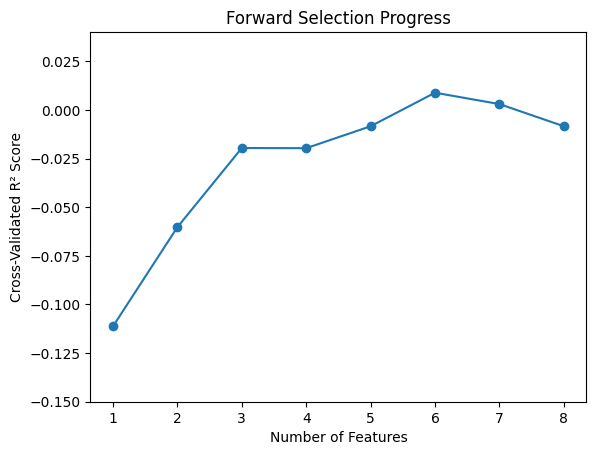

In [79]:
import matplotlib.pyplot as plt

# Plot performance vs number of features
fig = plt.figure() #gives figure
ax = plt.gca() #gives axes 

k_feat = list(sfs.subsets_.keys())                     # 1, 2, 3, ...
scores = [sfs.subsets_[k]['avg_score'] for k in k_feat]  # Corresponding scores
ax.set_ylim(top= 0.04, bottom = -0.15)
ax.plot(k_feat, scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated R² Score')
plt.title('Forward Selection Progress')
plt.show()


# 🧩 2. Backward Elimination using MLXtend

<img src="/home/akash/VScode/ML/EDA/9.1BackwardSelection.png" alt="9.1ForwardSelection" width="1200" height="800">

### 📘 Concept:

- **Start with all features, and remove one at a time that hurts performance the least — until removing more starts reducing performance.**
  
### 🪜 Steps:

1. **Choose a base estimator/model**

2. Use **`SequentialFeatureSelector`** with:

- **`forward=False`**

- **`floating=False`**

3. **Set scoring and CV parameters**

5. Fit and review best subset

In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

sfs1 = SequentialFeatureSelector(
    lr,
    k_features="best",
    forward = False,
    
)

In [97]:
sfs1.fit(x,y)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 8), scoring='accuracy')

In [98]:
sfs1.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [99]:
sfs1.k_feature_names_

('Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age')

In [100]:
sfs.k_score_

np.float64(0.7747899159663865)

# ⚖️ Forward vs Backward in MLXtend

| Feature Selection Type   | Parameter       | Start Point  | Direction        | When to Use                    |
| ------------------------ | --------------- | ------------ | ---------------- | ------------------------------ |
| **Forward Selection**    | `forward=True`  | Empty set    | Adds features    | When dataset has many features |
| **Backward Elimination** | `forward=False` | All features | Removes features | When dataset has few features  |

